In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
df=pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Data Exploration and Cleaning

In [228]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [229]:
col={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=col, inplace=True)
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [231]:
df.drop(['id'],axis=1,inplace=True)

Checking for number of uniques values and the unique values of each feature along with their respective missing values count.

In [232]:
missing=[]
for col in df.columns:
    print(col,end="-")
    num=len(df[col].unique())
    print(num," Unique Values")
    print("Values -> ",df[col].unique())
    print("Missing Values % ->",(df[col].isna().sum()/len(df[col]))*100)
    print()
    if df[col].isna().sum()>=1:
        missing.append(col)
print()
print("Columns with Missing Values : ",missing)
print(len(missing))

age-77  Unique Values
Values ->  [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
Missing Values % -> 2.25

blood_pressure-11  Unique Values
Values ->  [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
Missing Values % -> 3.0

specific_gravity-6  Unique Values
Values ->  [1.02  1.01  1.005 1.015   nan 1.025]
Missing Values % -> 11.75

albumin-7  Unique Values
Values ->  [ 1.  4.  2.  3.  0. nan  5.]
Missing Values % -> 11.5

sugar-7  Unique Values
Values ->  [ 0.  3.  4.  1. nan  2.  5.]
Missing Values % -> 12.25

red_blood_cells-3  Unique Values
Values ->  [nan 'normal' 'abnormal']
Missing Values % -> 38.0

pus_cell-3  Unique Values
Values ->  ['normal' 'abnormal' nan]
Missing Values % -> 16.25

pus_cell_clumps-3  Uni

In [233]:
df['packed_cell_volume'] = df['packed_cell_volume'].replace(to_replace = {'\t?': np.nan,'\t43':'43'})
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')

df['white_blood_cell_count'] = df['white_blood_cell_count'].replace(to_replace = {'\t6200': '6200','\t8400':'8400','\t?': np.nan})
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')

df['red_blood_cell_count'] = df['red_blood_cell_count'].replace(to_replace = {'\t?': np.nan})
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = {' yes': 'yes','\tno':'no','\tyes':'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = {'\tno':'no'})
df['classification'].replace(to_replace='ckd\t',value='ckd',inplace=True)

In [234]:
cor=df.corr()
cor

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
blood_urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
serum_creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


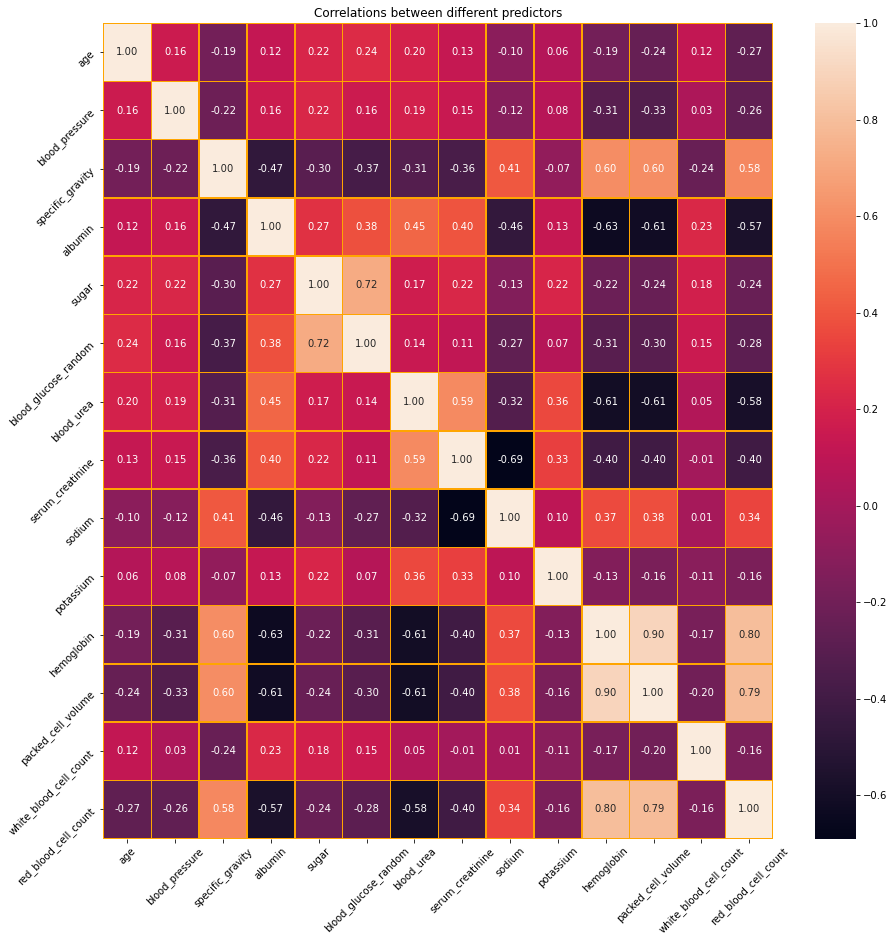

In [235]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(cor,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()s

#### Positive Correlation
1. specific_gravity->hemoglobin,packed_cell_volume (Same correlation. Do further study on both features), red_blood_cell_count
2. sugar-> blood_glucose_random
3. blood_urea->serum_creatinine
4. hemoglobin->packed_cell_volume (Very High), red_blood_cell_count (High)

#### Negative Correlation
1. specific_gravity->albumin
2. albumin->sodium, hemoglobin, packed_cell_volume,red_blood_cell_count
3. blood_urea->hemoglobin,packed_cell_volume,red_blood_cell_count
4. serum_creatinine->sodium

In [236]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes=='float64']
print('Total numerical features :',len(numerical_features))
print(numerical_features)

Total numerical features : 14
['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [237]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Total categorical features :',len(categorical_features))
print(categorical_features)

Total categorical features : 11
['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']


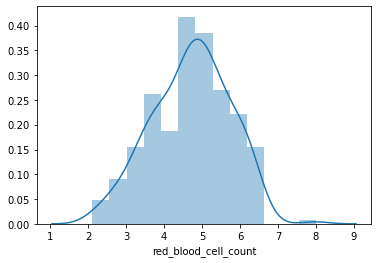

In [244]:
sns.distplot(df['red_blood_cell_count'])

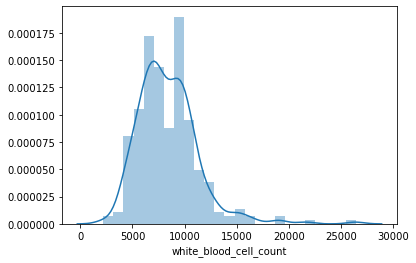

In [243]:
sns.distplot(df['white_blood_cell_count'])

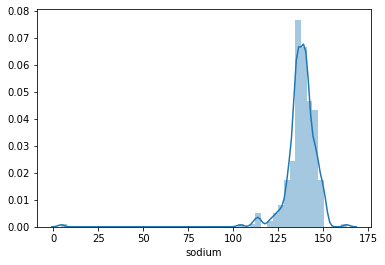

In [245]:
sns.distplot(df['sodium'])

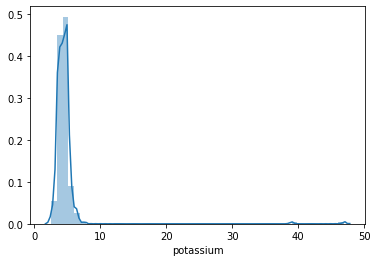

In [246]:
sns.distplot(df['potassium'])

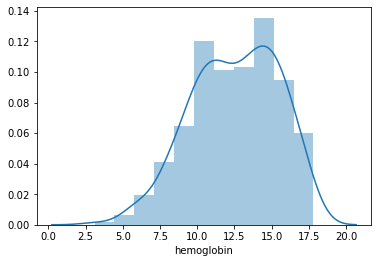

In [247]:
sns.distplot(df['hemoglobin'])

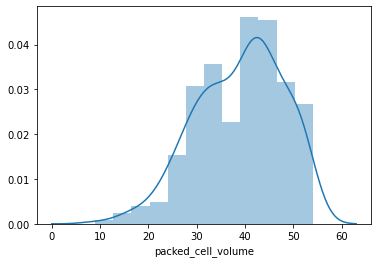

In [248]:
#packed_cell_volume
sns.distplot(df['packed_cell_volume'])

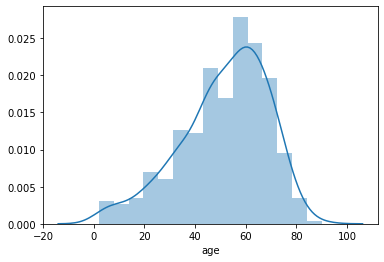

In [152]:
#Age
sns.distplot(df['age'])

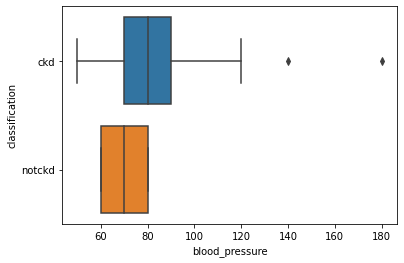

In [179]:
#Blood Pressure
sns.boxplot(x="blood_pressure", y="classification", data=df)

In [164]:
#specific_gravity - MAR
print("NUmber of missing values : ",df['specific_gravity'].isnull().sum())
df['specific_gravity_null']=np.where(df['specific_gravity'].isnull(),1,0)
df.groupby(['classification'])['specific_gravity_null'].mean()

NUmber of missing values :  47


classification
ckd       0.168000
notckd    0.033333
Name: specific_gravity_null, dtype: float64

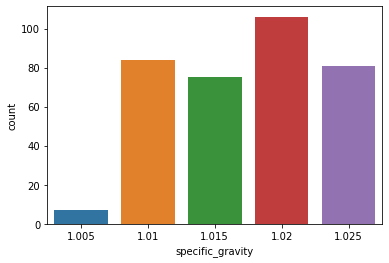

In [158]:
sns.countplot(df['specific_gravity'])

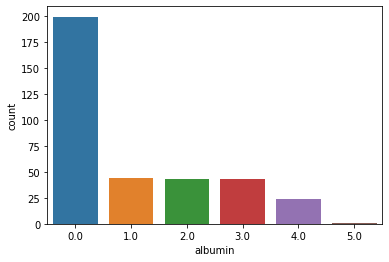

In [241]:
sns.countplot(df['albumin'])

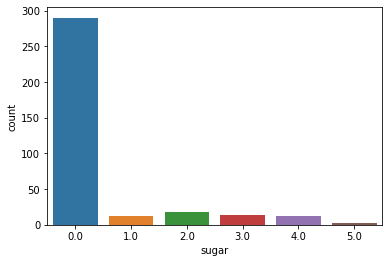

In [242]:
sns.countplot(df['sugar'])

In [165]:
# albumin
print("NUmber of missing values : ",df['albumin'].isnull().sum())
df['albumin_null']=np.where(df['albumin'].isnull(),1,0)
df.groupby(['classification'])['albumin_null'].mean()

NUmber of missing values :  46


classification
ckd       0.164000
notckd    0.033333
Name: albumin_null, dtype: float64

In [166]:
# sugar
print("Number of missing values : ",df['sugar'].isnull().sum())
df['sugar_null']=np.where(df['sugar'].isnull(),1,0)
df.groupby(['classification'])['sugar_null'].mean()

Number of missing values :  49


classification
ckd       0.176000
notckd    0.033333
Name: sugar_null, dtype: float64

In [175]:
df1=df[df['specific_gravity'].isnull()]
df2=df1[df1['albumin'].isnull()]
len(df2[df2['sugar'].isnull()])

44

Therefore specific_gravity, albumin and sugar are missing together in majority cases.
1. MNAR variables. The patient didn't enter the 3 values in majority cases of Null values it seems.
2. Already Ordinally encoded values - Ratings based. Therefore no need for encoding.

In [239]:
## red_blood_cells
print("NUmber of missing values : ",df['red_blood_cells'].isnull().sum())

NUmber of missing values :  152


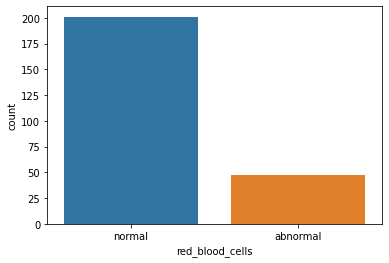

In [240]:
sns.countplot(df['red_blood_cells'])

#### Handling Missing Values
1. Drop NaN Rows - age, blood_pressure, serum_creatinine, pus_cell_clumps, bacteria, hypertension, diabetes_mellitus, coronary_artery_disease, appetite, pedal_edema, and anemia
2. Mean Replacement - red_blood_cell_count, white_blood_cell_count, hemoglobin, packed_cell_volume
3. red_blood_cells - Capturing using extra variable
4. Multiple Imputation - sodium,potassium (both highly skewed)
5. Using KNN Imputation for specific_gravity, albumin and sugar. Has to be done after dealing with other variables.

In [249]:
print('Original Shape : ',df.shape)
df.dropna(subset=['age', 'blood_pressure', 'serum_creatinine', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 
                  'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia'],inplace=True)
print('New Shape : ',df.shape)

Original Shape :  (400, 25)
New Shape :  (358, 25)


In [250]:
def impute_nan(df,variable,cent_tend):
    df["{var}_".format(var=variable)+"{tend}".format(tend=cent_tend[0])]=df[variable].fillna(cent_tend[1])
    fig=plt.figure()
    ax=fig.add_subplot(111)
    df[variable].plot(kind='kde',ax=ax,color='red')
    df[variable+"_{tend}".format(tend=cent_tend[0])].plot(kind='kde',ax=ax,color='blue')
    lines,labels=ax.get_legend_handles_labels()
    ax.legend(lines,labels,loc='best')
    print("Using {tend}".format(tend=cent_tend[0]))
    print(df[variable].std()," to ",end=" ")
    print(df[variable+"_{tend}".format(tend=cent_tend[0])].std())

Using mean
1.030266795372115  to  0.858699945755877


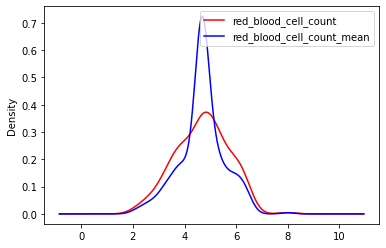

In [251]:
variable='red_blood_cell_count'
mean=df[variable].mean()
cent_tend=('mean',mean)
impute_nan(df,variable,cent_tend)

Using mean
3003.2114439151464  to  2602.071339210295


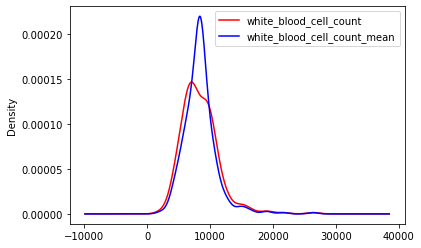

In [252]:
variable='white_blood_cell_count'
mean=df[variable].mean()
cent_tend=('mean',mean)
impute_nan(df,variable,cent_tend)

Using mean
2.9145613515951556  to  2.7377536743402766


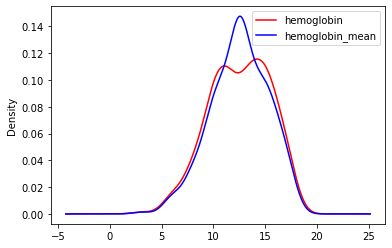

In [253]:
variable='hemoglobin'
mean=df[variable].mean()
cent_tend=('mean',mean)
impute_nan(df,variable,cent_tend)

Using mean
8.987355790362601  to  8.22495292429747


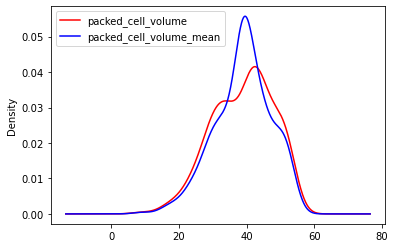

In [254]:
variable='packed_cell_volume'
mean=df[variable].mean()
cent_tend=('mean',mean)
impute_nan(df,variable,cent_tend)

In [265]:
df.drop(['red_blood_cell_count_mean','white_blood_cell_count_mean','hemoglobin_mean','packed_cell_volume_mean'],axis=1,inplace=True)
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification',
       'red_blood_cell_count_random', 'white_blood_cell_count_random',
       'hemoglobin_random', 'packed_cell_volume_random'],
      dtype='object')

In [256]:
def impute_nan_random(df,variable):
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]=random_sample
    
    fig=plt.figure()
    ax=fig.add_subplot(111)
    df[variable].plot(kind='kde',ax=ax,color='red')
    df[variable+"_random"].plot(kind='kde',ax=ax,color='blue')
    lines,labels=ax.get_legend_handles_labels()
    ax.legend(lines,labels,loc='best')

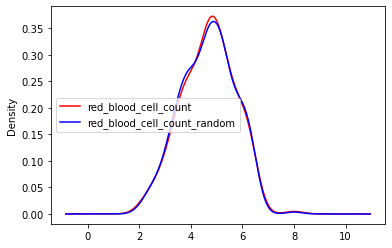

In [257]:
variable='red_blood_cell_count'
impute_nan_random(df,variable)

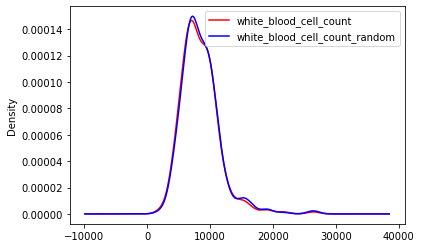

In [258]:
variable='white_blood_cell_count'
impute_nan_random(df,variable)

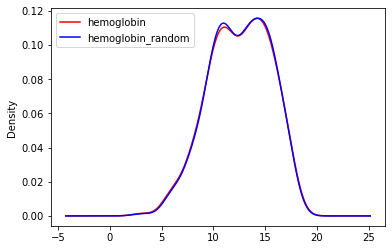

In [259]:
variable='hemoglobin'
impute_nan_random(df,variable)

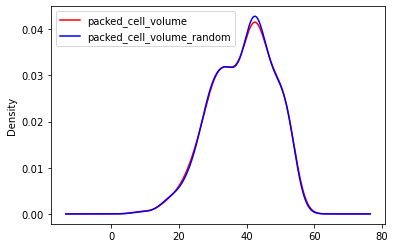

In [260]:
variable='packed_cell_volume'
impute_nan_random(df,variable)

In [266]:
df.drop(['red_blood_cell_count','white_blood_cell_count','hemoglobin','packed_cell_volume'],axis=1,inplace=True)
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia',
       'classification', 'red_blood_cell_count_random',
       'white_blood_cell_count_random', 'hemoglobin_random',
       'packed_cell_volume_random'],
      dtype='object')

In [267]:
df.shape

(358, 25)

In [269]:
df['red_blood_cells']=np.where(df['red_blood_cells'].isnull(),"Missing",df['red_blood_cells'])
df['red_blood_cells'].isna().sum()

0

In [275]:
df['pus_cell']=np.where(df['pus_cell'].isnull(),"Missing",df['pus_cell'])
df['pus_cell'].isna().sum()

0

In [280]:
df['blood_urea'].dropna(inplace=True)

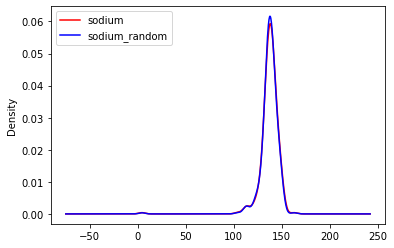

In [270]:
variable='sodium'
impute_nan_random(df,variable)

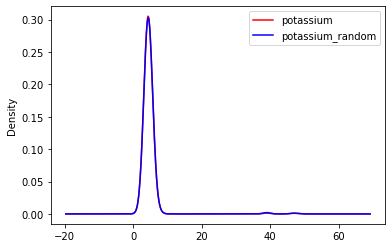

In [271]:
variable='potassium'
impute_nan_random(df,variable)

In [273]:
df.drop(['potassium','sodium'],axis=1,inplace=True)
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'appetite', 'pedal_edema', 'anemia', 'classification',
       'red_blood_cell_count_random', 'white_blood_cell_count_random',
       'hemoglobin_random', 'packed_cell_volume_random', 'sodium_random',
       'potassium_random'],
      dtype='object')

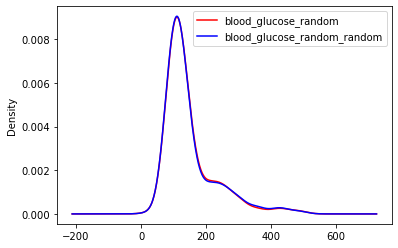

In [278]:
variable='blood_glucose_random'
impute_nan_random(df,variable)
df.drop(['blood_glucose_random'],axis=1,inplace=True)

In [281]:
for col in df.columns:
    print(col)
    print("Missing Values % ->",(df[col].isna().sum()/len(df[col]))*100)

age
Missing Values % -> 0.0
blood_pressure
Missing Values % -> 0.0
specific_gravity
Missing Values % -> 11.731843575418994
albumin
Missing Values % -> 11.452513966480447
sugar
Missing Values % -> 12.290502793296088
red_blood_cells
Missing Values % -> 0.0
pus_cell
Missing Values % -> 0.0
pus_cell_clumps
Missing Values % -> 0.0
bacteria
Missing Values % -> 0.0
blood_urea
Missing Values % -> 0.0
serum_creatinine
Missing Values % -> 0.0
hypertension
Missing Values % -> 0.0
diabetes_mellitus
Missing Values % -> 0.0
coronary_artery_disease
Missing Values % -> 0.0
appetite
Missing Values % -> 0.0
pedal_edema
Missing Values % -> 0.0
anemia
Missing Values % -> 0.0
classification
Missing Values % -> 0.0
red_blood_cell_count_random
Missing Values % -> 0.0
white_blood_cell_count_random
Missing Values % -> 0.0
hemoglobin_random
Missing Values % -> 0.0
packed_cell_volume_random
Missing Values % -> 0.0
sodium_random
Missing Values % -> 0.0
potassium_random
Missing Values % -> 0.0
blood_glucose_random